In [1]:
%matplotlib inline

import ephem

import numpy as np
import matplotlib.pyplot as plt

# Larger figure size
fig_size = [14, 8]
plt.rcParams['figure.figsize'] = fig_size

c = 299792458
f_down = 436.5e6
f_up = 145.9e6

line1 = "LILACSAT-1"
line2 = "1 42725U 98067ME  17189.87025697 +.00007644 +00000-0 +11689-3 0  9999"
line3 = "2 42725 051.6407 289.9183 0007265 030.1333 330.0075 15.55443398006852"

sat = ephem.readtle(line1, line2, line3)

line2 = "1 42725U 98067ME  17183.50952476 +.00011042 +00000-0 +16628-3 0  9992"
line3 = "2 42725 051.6406 321.6862 0006959 008.0741 352.0361 15.55338480005862"
sat_old = ephem.readtle(line1, line2, line3)

ea4gpz_qth = ephem.Observer()
ea4gpz_qth.lat, ea4gpz_qth.lon, ea4gpz_qth.elevation = '40.6007', '-3.7080', 700

m0hxm_qth = ephem.Observer()
m0hxm_qth.lat, m0hxm_qth.long, m0hxm_qth.elevation = '54.9795', '-1.6270', 0

start = ephem.Date('2017/7/9 03:12:00')
t_step = 1e-2
ts = np.arange(0, 600, t_step)

def computeDoppler(tles, delay = 0.0, freq = f_down, qth = ea4gpz_qth):
    dopplers = np.empty_like(ts)
    for j in range(len(ts)):
        qth.date = start + ts[j]*ephem.second - delay*ephem.second
        tles.compute(qth)
        dopplers[j] = -tles.range_velocity/c*freq
    return dopplers

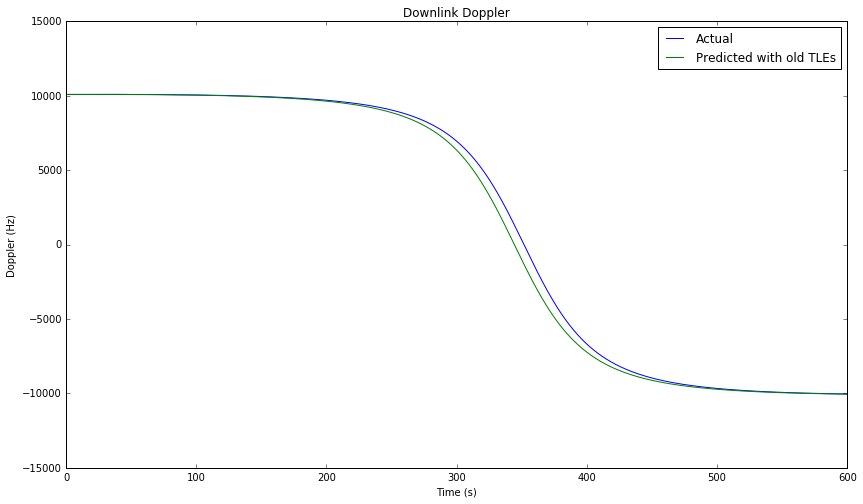

In [2]:
plt.plot(ts, computeDoppler(sat), ts, computeDoppler(sat_old))
plt.title('Downlink Doppler')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)')
plt.legend(['Actual', 'Predicted with old TLEs']);

In [3]:
best_delay_old = (np.argmin(np.abs(computeDoppler(sat))) - np.argmin(np.abs(computeDoppler(sat_old))))*t_step
print(best_delay_old)

7.38


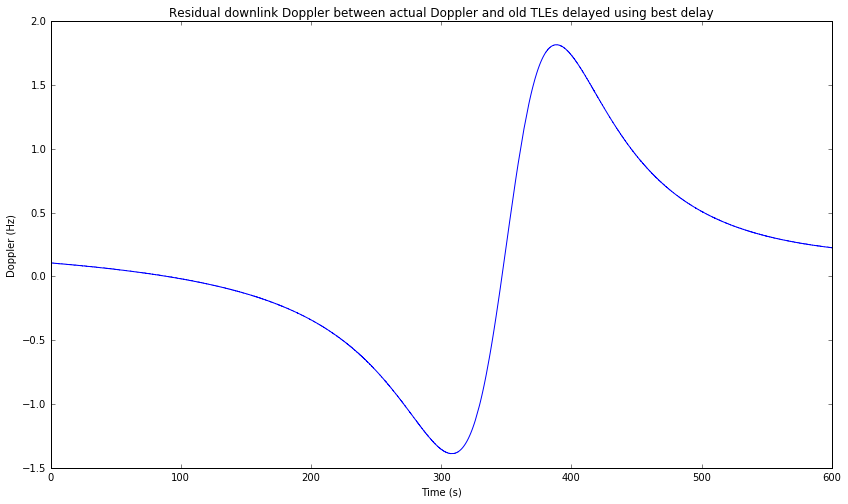

In [4]:
plt.plot(ts, computeDoppler(sat) - computeDoppler(sat_old, best_delay_old))
plt.title('Residual downlink Doppler between actual Doppler and old TLEs delayed using best delay')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)');

In [5]:
old_tles = """1 42725U 98067ME  17182.48148278 +.00008148 +00000-0 +12470-3 0  9999
2 42725 051.6408 326.8202 0006909 004.4818 355.6233 15.55315423005701
1 42725U 98067ME  17182.86700034 +.00008741 +00000-0 +13322-3 0  9991
2 42725 051.6407 324.8950 0006943 005.8620 354.2451 15.55322490005789
1 42725U 98067ME  17183.50952476 +.00011042 +00000-0 +16628-3 0  9992
2 42725 051.6406 321.6862 0006959 008.0741 352.0361 15.55338480005862
1 42725U 98067ME  17183.83078471 +.00011457 +00000-0 +17220-3 0  9991
2 42725 051.6406 320.0818 0006991 009.1765 350.9353 15.55345942005915
1 42725U 98067ME  17184.21629423 +.00011089 +00000-0 +16686-3 0  9999
2 42725 051.6407 318.1565 0007005 010.4660 349.6476 15.55354515005994
1 42725U 98067ME  17184.60180232 +.00009537 +00000-0 +14449-3 0  9992
2 42725 051.6407 316.2311 0007022 011.8205 348.2950 15.55360455006051
1 42725U 98067ME  17184.85880620 +.00009137 +00000-0 +13871-3 0  9991
2 42725 051.6405 314.9475 0007040 012.7461 347.3707 15.55366288006071
1 42725U 98067ME  17185.24431114 +.00007636 +00000-0 +11709-3 0  9995
2 42725 051.6405 313.0223 0007065 014.1499 345.9689 15.55371477006154
1 42725U 98067ME  17185.56556404 +.00007827 +00000-0 +11981-3 0  9994
2 42725 051.6405 311.4177 0007062 015.3173 344.8031 15.55377347006200
1 42725U 98067ME  17185.75831540 +.00008053 +00000-0 +12304-3 0  9994
2 42725 051.6405 310.4551 0007072 015.9177 344.2035 15.55380602006213
1 42725U 98067ME  17186.20806684 +.00007684 +00000-0 +11770-3 0  9991
2 42725 051.6407 308.2088 0007093 017.5260 342.5975 15.55387614006280
1 42725U 98067ME  17186.59356662 +.00007491 +00000-0 +11490-3 0  9994
2 42725 051.6406 306.2835 0007113 018.8559 341.2695 15.55393324006364
1 42725U 98067ME  17186.59356662 +.00007491 +00000-0 +11490-3 0  9994
2 42725 051.6406 306.2835 0007113 018.8559 341.2695 15.55393324006342
1 42725U 98067ME  17187.62155893 +.00006620 +00000-0 +10233-3 0  9999
2 42725 051.6409 301.1494 0007144 022.3856 337.7446 15.55407759006526
1 42725U 98067ME  17187.94280461 +.00007041 +00000-0 +10836-3 0  9991
2 42725 051.6409 299.5449 0007163 023.4799 336.6518 15.55413135006573
1 42725U 98067ME  17188.52104432 +.00007896 +00000-0 +12060-3 0  9998
2 42725 051.6409 296.6568 0007193 025.4606 334.6738 15.55422509006640
1 42725U 98067ME  17188.90653574 +.00007620 +00000-0 +11662-3 0  9998
2 42725 051.6409 294.7316 0007224 026.7821 333.3542 15.55427837006725
1 42725U 98067ME  17189.54901761 +.00007594 +00000-0 +11620-3 0  9997
2 42725 051.6408 291.5227 0007251 029.0271 331.1122 15.55437928006806
"""

lines = old_tles.split('\n')
old_ephems = [ephem.readtle(line1, l2, l3) for l2, l3 in zip(lines[::2], lines[1::2])]

def best_delay(eph):
    return (np.argmin(np.abs(computeDoppler(sat))) - np.argmin(np.abs(computeDoppler(eph))))*t_step

def age(eph):
    return sat._epoch - eph._epoch

ages = np.array(list(map(age, old_ephems)))
best_delays = list(map(best_delay, old_ephems))

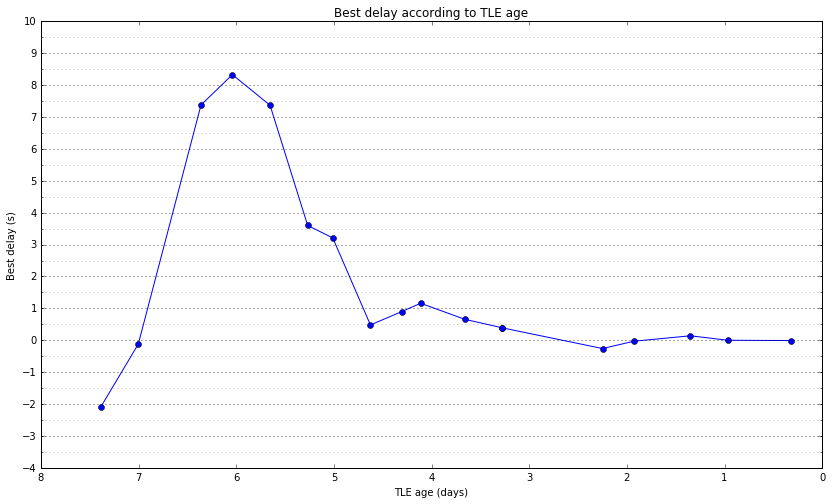

In [6]:
import matplotlib.ticker

plt.plot(ages, best_delays, 'o-')
ax = plt.gca()
ax.invert_xaxis()
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
plt.grid(axis='y', which='minor', alpha=0.5);
plt.grid(axis='y')
plt.title('Best delay according to TLE age')
plt.xlabel('TLE age (days)')
plt.ylabel('Best delay (s)');

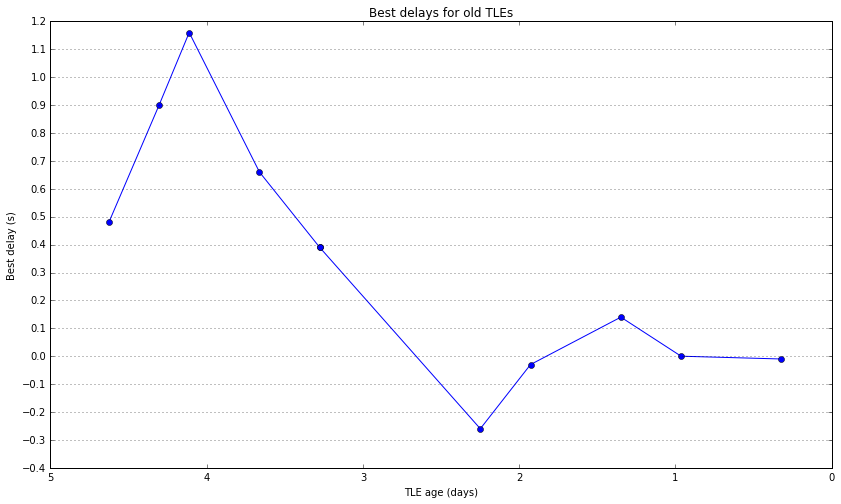

In [7]:
starting = 7
plt.plot(ages[starting:], best_delays[starting:], 'o-')
ax = plt.gca()
ax.invert_xaxis()
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
plt.grid(axis='y', which='minor', alpha=0.5);
plt.grid(axis='y')
plt.title('Best delays for old TLEs')
plt.xlabel('TLE age (days)')
plt.ylabel('Best delay (s)');

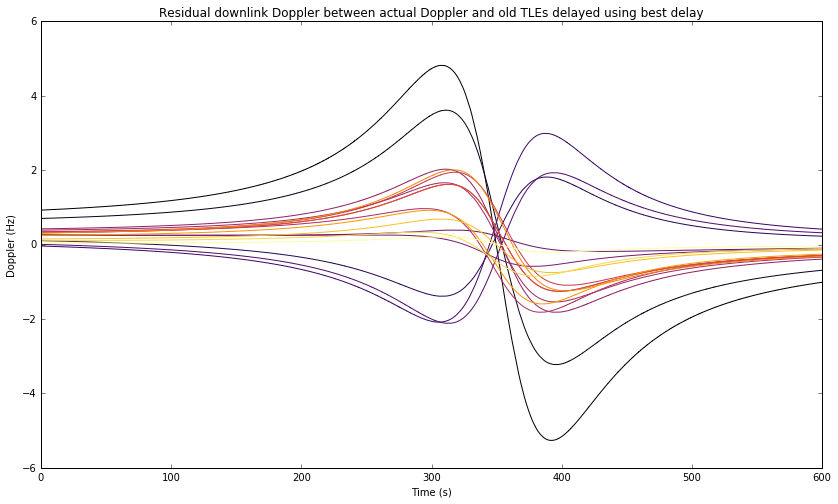

In [8]:
import matplotlib.cm
import matplotlib.colors

age_cmap = matplotlib.cm.ScalarMappable(norm = matplotlib.colors.Normalize(vmin = ages[-1], vmax = ages[0]), cmap = 'inferno_r')
age_cmap.to_rgba(ages[2])

for eph, delay, age in zip(old_ephems, best_delays, ages):
    plt.plot(ts, computeDoppler(sat) - computeDoppler(eph, delay), color = age_cmap.to_rgba(age))
plt.title('Residual downlink Doppler between actual Doppler and old TLEs delayed using best delay')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)');

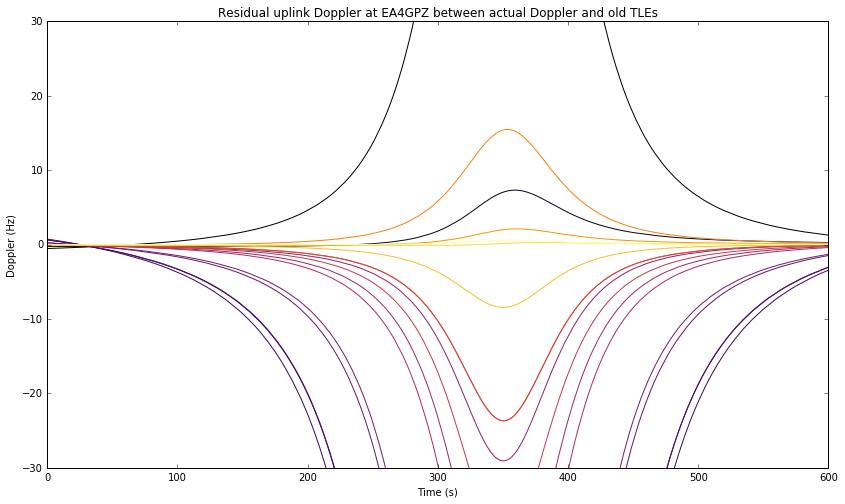

In [9]:
for eph, age in zip(old_ephems, ages):
    plt.plot(ts, -computeDoppler(sat, freq = f_up) + computeDoppler(eph, freq = f_up), color = age_cmap.to_rgba(age))
plt.title('Residual uplink Doppler at EA4GPZ between actual Doppler and old TLEs')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)')
plt.ylim((-30, 30));

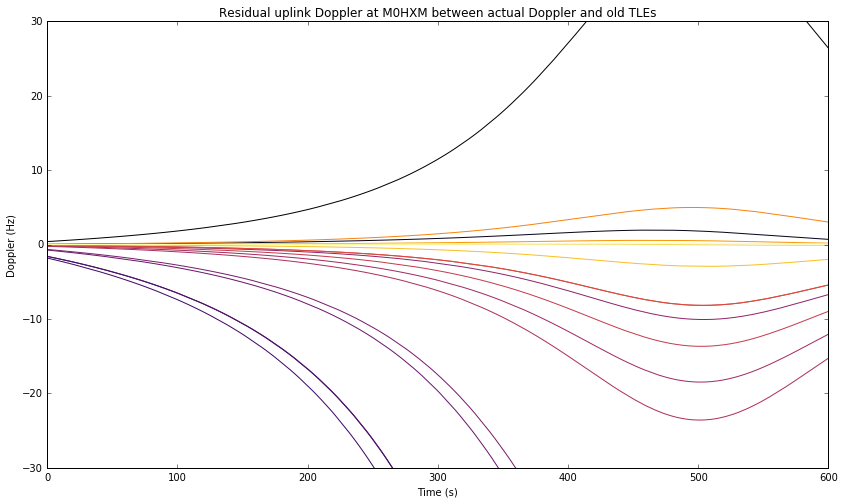

In [10]:
for eph, age in zip(old_ephems, ages):
    plt.plot(ts, -computeDoppler(sat, freq = f_up, qth = m0hxm_qth) + computeDoppler(eph, freq = f_up, qth = m0hxm_qth), color = age_cmap.to_rgba(age))
plt.title('Residual uplink Doppler at M0HXM between actual Doppler and old TLEs')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)')
plt.ylim((-30, 30));

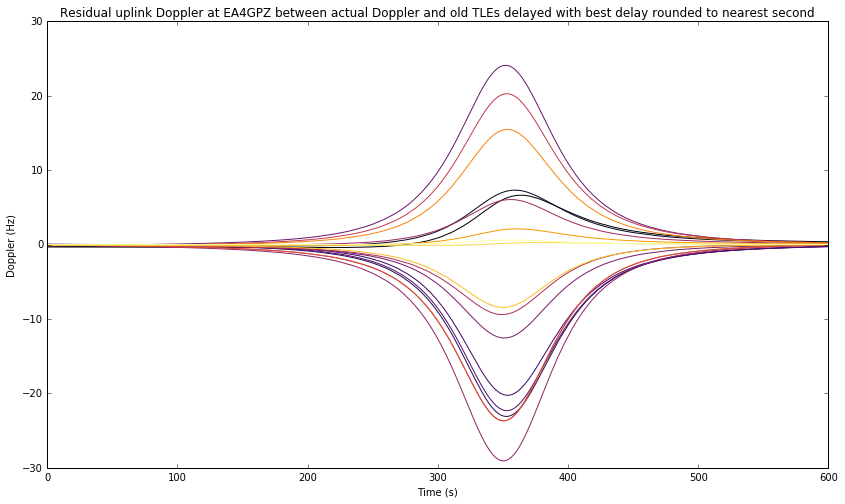

In [11]:
for eph, delay, age in zip(old_ephems, best_delays, ages):
    plt.plot(ts, -computeDoppler(sat, freq = f_up) + computeDoppler(eph, delay = round(delay), freq = f_up), color = age_cmap.to_rgba(age))
plt.title('Residual uplink Doppler at EA4GPZ between actual Doppler and old TLEs delayed with best delay rounded to nearest second')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)')
plt.ylim((-30, 30));

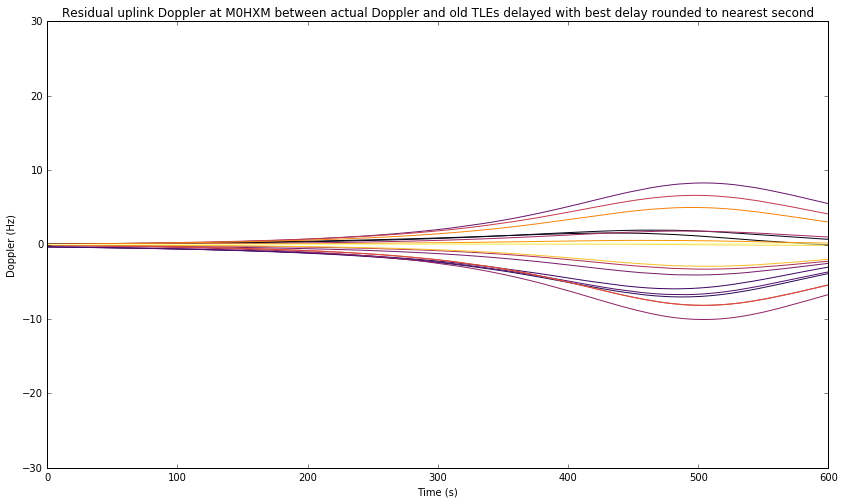

In [12]:
for eph, delay, age in zip(old_ephems, best_delays, ages):
    plt.plot(ts, -computeDoppler(sat, freq = f_up, qth = m0hxm_qth) + computeDoppler(eph, delay = round(delay), freq = f_up, qth = m0hxm_qth), color = age_cmap.to_rgba(age))
plt.title('Residual uplink Doppler at M0HXM between actual Doppler and old TLEs delayed with best delay rounded to nearest second')
plt.xlabel('Time (s)')
plt.ylabel('Doppler (Hz)')
plt.ylim((-30, 30));